Задача 1.Выборка с весами.

[0.05973120955699353, 0.20905923344947736, 0.2921851667496267, 0.4116475858636137, 0.5659532105525137, 0.8347436535589846, 0.8899950223992036, 0.8999502239920358, 0.9004479840716775, 1.0]
Time    0.005984067916870117


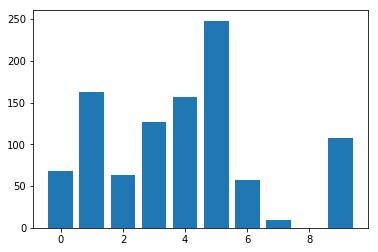

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import time
a = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
a=a/a.sum()
b = [a[:i].sum() for i in range(1,11)]
r = [np.random.rand() for i in range(1000)]
lul = np.zeros(10)
start=time.time()
for i in range(1000):
    k=0
    while k!=-1:
        if r[i]<b[k]:
            lul[k]=lul[k]+1
            k=-1
        else:
            k+=1
end = time.time()
print("Time   ", end-start)
plt.bar(np.arange(10), lul)
plt.show()

Time  after sort  0.003989696502685547


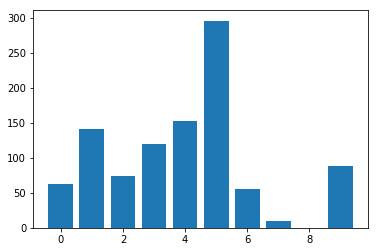

In [15]:
a = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
ind = np.argsort(a)[::-1]
a = np.sort(a)[::-1]
a=a/a.sum()
b = [a[:i].sum() for i in range(1,11)]
r = [np.random.rand() for i in range(1000)]
lul = np.zeros(10)
start=time.time()
for i in range(1000):
    k=0
    while k!=-1:
        if r[i]<b[k]:
            lul[k]=lul[k]+1
            k=-1
        else:
            k+=1
end = time.time()
print("Time  after sort ", end-start)
plt.bar(ind, lul)
plt.show()

Задача 2 Exp

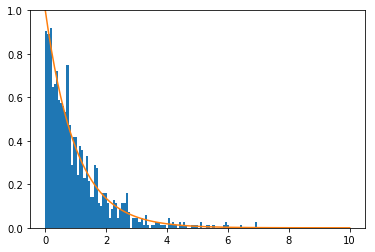

In [41]:
import math
r = [np.random.rand() for i in range(1000)]
new=np.array([-math.log((1-r[i])) for i in range (1000)])
x = np.linspace(0, 10, 100)
x1=np.array([math.exp(-x[i]) for i in range (100)])
plt.hist( new,density=True,bins = 100)
plt.ylim(0, 1)
plt.plot(x, x1)
plt.show()

Задача 3 accept-reject

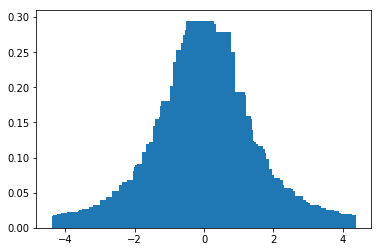

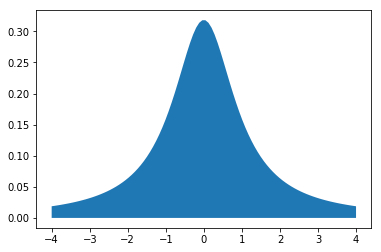

In [51]:
from scipy import stats
import numpy as np
dist = stats.cauchy()
x = np.linspace(-4, 4, 100)
r = [8*np.random.rand()-4 for i in range(1000)]
lul = []
k=0
while k!=1000:
    dens = 1/math.pi*np.random.rand()
    if dens < 1/(math.pi*(1+r[k]**2)):
        lul.append(dens)
        k+=1
plt.bar(r, lul)
plt.show()
plt.fill_between(x, 0, dist.pdf(x)) #needs to be normalized!
plt.show()

Задача 4 в тругольнике

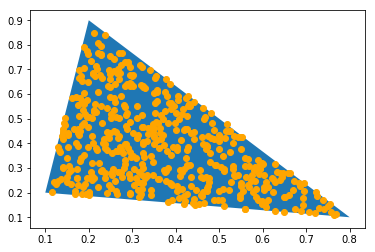

In [12]:
import numpy as np
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection


lr = np.array([np.random.rand() for i in range(500)])
ur= np.array([np.random.rand() for i in range(500)])

x=0.1 *(1+1*np.sqrt(lr))
y=0.1 *(2+7*np.sqrt(lr))
x=x+np.sqrt(lr)*ur*0.6
y=y-np.sqrt(lr)*ur*0.8
polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.scatter(x, y, color='orange')
plt.show()

Задача 5. В круге

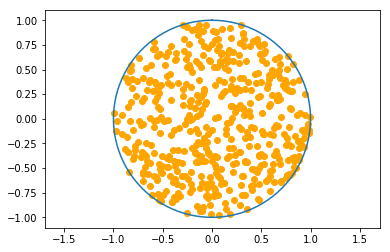

In [6]:
from matplotlib.patches import Circle
an = np.array([np.random.rand() for i in range(500)])
ra= np.array([np.random.rand() for i in range(500)])
r=np.sqrt(ra)
ang=2*np.pi*an
t = np.linspace(0, 2 * np.pi, 100)
x=r*np.cos(ang)
y=r*np.sin(ang)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.scatter(x, y, color='orange')
plt.show()

Задача 6.

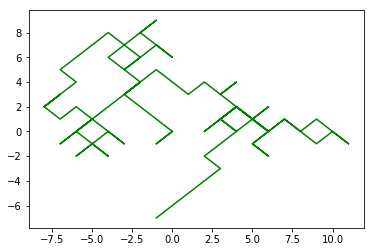

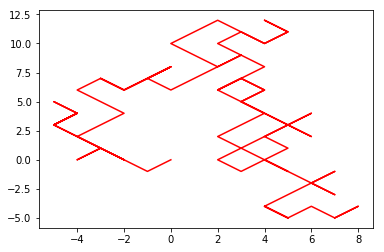

In [89]:
def lul(n):
    lulx=np.random.choice(2, n)
    luly=np.random.choice(2, n)
    x = np.zeros(n)
    y = np.zeros(n)
    for i in range(n-1):
        x[i+1]=x[i]+(-1)**lulx[i]
        y[i+1]=y[i]+(-1)**luly[i]
    return x,y
x, y = lul(100)
plt.plot(x,y, color='green')
plt.show()
x, y = lul(100)
plt.plot(x,y, color='red')
plt.show()

Задача 7. Модель нормального распределения без cos sin

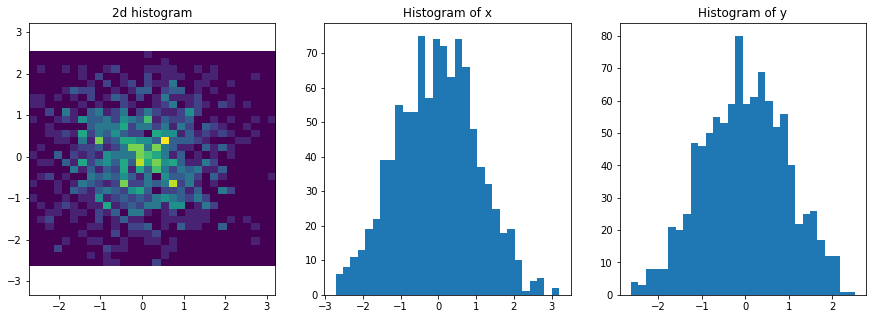

In [96]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
tart1=2*np.random.rand( n)-1
tart2=2*np.random.rand( n)-1
x = r * tart1/((tart1*tart1+tart2*tart2)**(1/2))
y = r * tart2/((tart1*tart1+tart2*tart2)**(1/2))
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

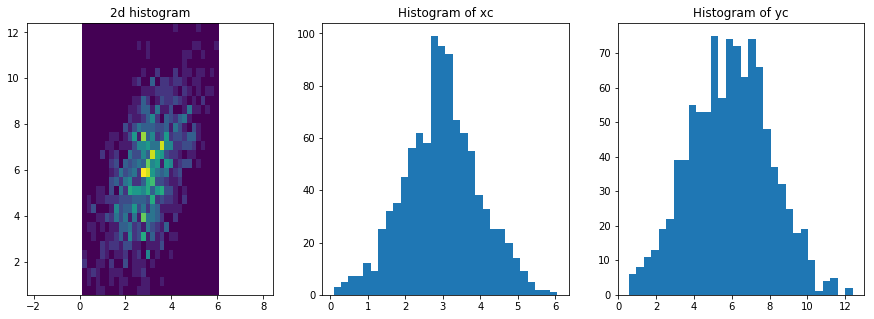

In [101]:
#уравенение AA(t)=матрица cov
Cov = np.array([[2,1],[1,4]])
d=0
c= (Cov[1][1] - d * d)**1/2
a=Cov[1][0]/c
b=(Cov[0][0] - a * a)**1/2
xc = a * x + b * y + 3
yc = c * x + d * y + 6
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(xc, yc, bins=30)
ax[0].axis('equal')
ax[1].hist(xc, bins=30)
ax[2].hist(yc, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of xc")
ax[2].set_title("Histogram of yc")
plt.show()

Задача 8. найти матрицу перехода по коваиации

In [ ]:
import sympy as sym
import numpy as np
B = np.array([[ 2.,  0.,  0.,  0., -1.,  0.,  0.,  0., -1.],
              [ 0.,  4.,  0., -1.,  0.,  0.,  0.,  0.,  0.],
              [ 0.,  0.,  4.,  0.,  0.,  0., -1.,  0.,  0.],
              [ 0., -1.,  0.,  4.,  0.,  0.,  0.,  0.,  0.],
              [-1.,  0.,  0.,  0.,  2.,  0.,  0.,  0., -1.],
              [ 0.,  0.,  0.,  0.,  0.,  4.,  0., -1.,  0.],
              [ 0.,  0., -1.,  0.,  0.,  0.,  4.,  0.,  0.],
              [ 0.,  0.,  0.,  0.,  0., -1.,  0.,  4.,  0.],
              [-1.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  2.]])
B1 = sym.Matrix([[ 2.,  0.,  0.,  0., -1.,  0.,  0.,  0., -1.],
              [ 0.,  4.,  0., -1.,  0.,  0.,  0.,  0.,  0.],
              [ 0.,  0.,  4.,  0.,  0.,  0., -1.,  0.,  0.],
              [ 0., -1.,  0.,  4.,  0.,  0.,  0.,  0.,  0.],
              [-1.,  0.,  0.,  0.,  2.,  0.,  0.,  0., -1.],
              [ 0.,  0.,  0.,  0.,  0.,  4.,  0., -1.,  0.],
              [ 0.,  0., -1.,  0.,  0.,  0.,  4.,  0.,  0.],
              [ 0.,  0.,  0.,  0.,  0., -1.,  0.,  4.,  0.],
              [-1.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  2.]])
X = sym.Matrix(sym.MatrixSymbol('X', 9, 9))
sym.solve([X*X.T - B1], X)
print(X)

Задача 9. оценка Pi

In [13]:
import numpy as np
lul=10000
x = 0
for i in range (lul):
    a, b = 2*np.random.rand(2, 1) - 1
    s = a * a + b * b
    if s <= 1:
        x=x+1
P = 4 * x / lul
print(P)
# Нер-во чебышова P{|P - Pi| > eps} < Var(P) / eps^2
#Var(P)=lul*Var(Ber(pi/4))/lul**2
#P=0.99,eps=10-3
#Var(p)= pi*(1-pi/4)/lul <10-6
#lul порядка 10^6 

3.1456


'C:\\Users\\novac\\notebooks'